# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Solutions:**

Answers given in assignment folder, labeled Q1_Q1_Q2, Q1_Q3, Q1_Q4, and Q1_Q5.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

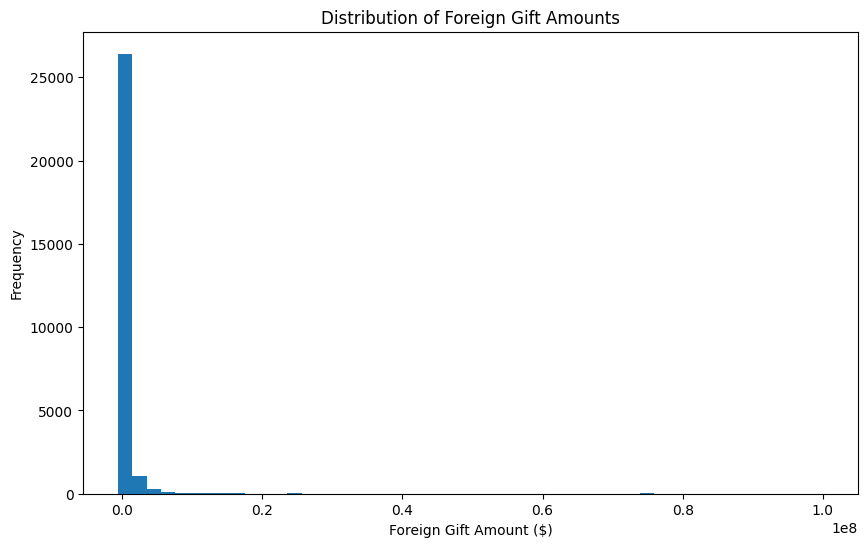

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('./data/ForeignGifts_edu.csv')

# creating a histogram 
plt.figure(figsize=(10, 6))  
df['Foreign Gift Amount'].hist(bins=50, grid=False) 
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.show()

# describing the variable
print(df.head(),'\n')
print(df.describe(),'\n')

My findings are this:
- The histogram is very skewed to the right. A lot of the gift amounts are at the lower end, with a long tail extending to extremely high values. 
- The mean, $42.9K, is much larger than the median, $9.5K, confirming the right skew
- The large standard deviation ($641.9K) relative to the mean suggests high variability in gift amounts.

This shows that while most institutions receive modest foreign gifts, there is also a smaller number that receive larger contributions.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

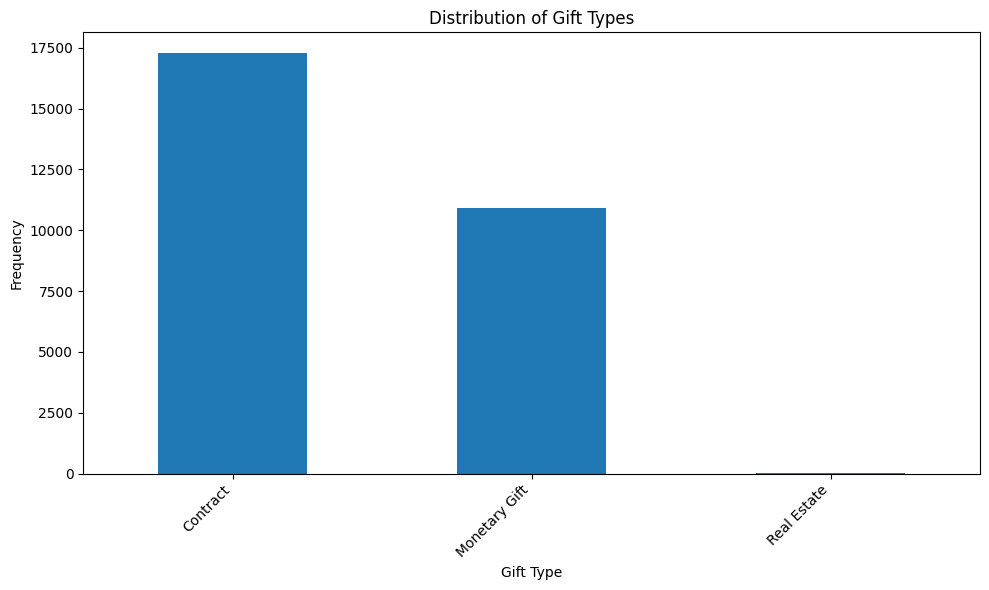

Gift Type Counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64 

Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64 



In [9]:
# creating a histogram 
plt.figure(figsize=(10, 6))
df['Gift Type'].value_counts().plot(kind='bar', grid=False)
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.title('Distribution of Gift Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# calculate proportions
print("Gift Type Counts:")
print(df['Gift Type'].value_counts(), '\n')

print("Gift Type Proportions:")
proportions = df['Gift Type'].value_counts(normalize=True)
print(proportions, '\n')

- Contracts: 61.21%
- Monetary Gifts: 38.75%
- Real Estate: 0.04%

4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

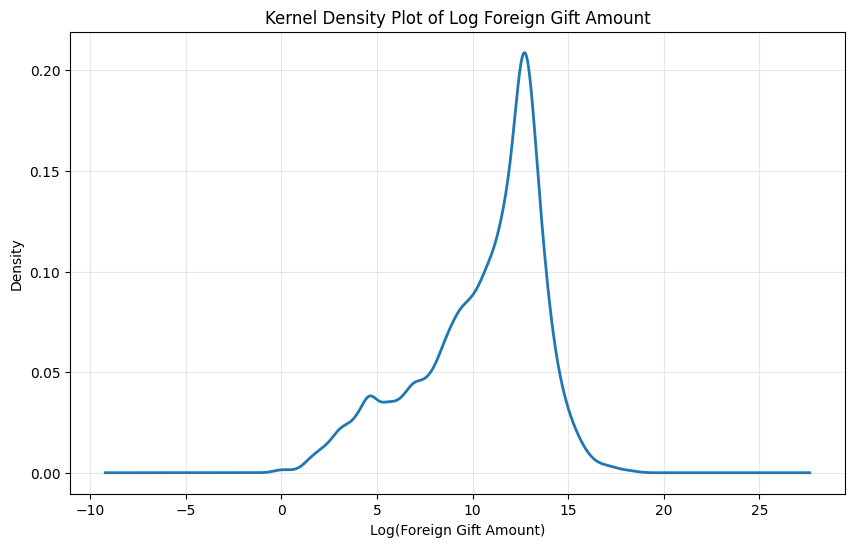

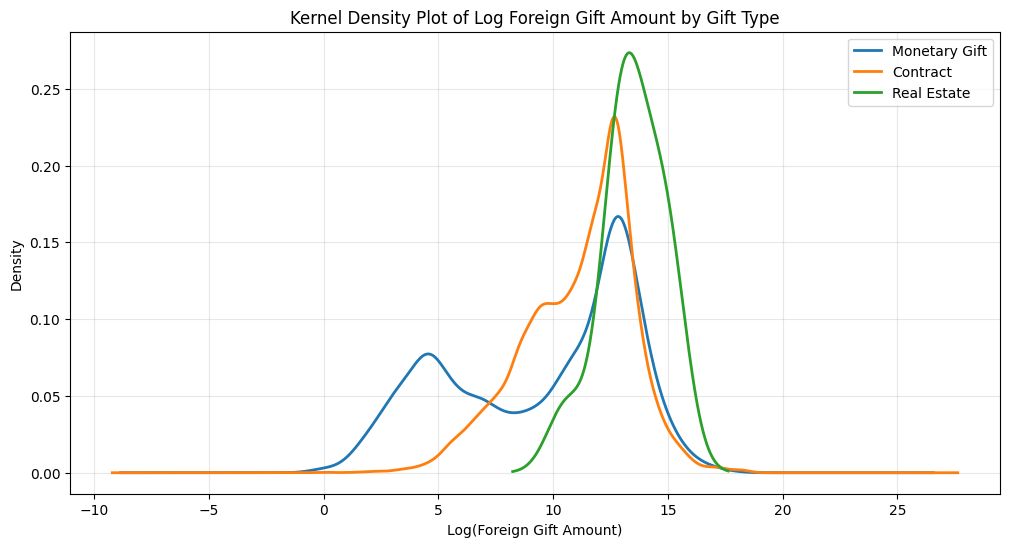

In [10]:
# data cleaning
df_clean = df[df['Foreign Gift Amount'] > 0].copy()
df_clean['Log Gift Amount'] = np.log(df_clean['Foreign Gift Amount'])

# kernel density plot of log of Foreign Gift Amount
plt.figure(figsize=(10, 6))
df_clean['Log Gift Amount'].plot(kind='kde', linewidth=2)
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.grid(True, alpha=0.3)
plt.show()

# kernel density plot conditional on Gift Type
plt.figure(figsize=(12, 6))
for gift_type in df_clean['Gift Type'].unique():
    subset = df_clean[df_clean['Gift Type'] == gift_type]
    if len(subset) > 0: 
        subset['Log Gift Amount'].plot(kind='kde', label=gift_type, linewidth=2)

plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

With the kernel density plots, there are some patterns:

With the first graph, (the log of foreign gift amounts) it shows a somewhat bell-curve shape that's centered. It's mostly symmetric with a left skew. 

With the second graph, theres 3 different types. The monetary gifts chart is bimodal and has two peaks (smaller ones and larger ones). The larger gifts are way more common based on the height of that second peak.
The contracts chart is mostly unimodal with one peak. The distribution is symmetric and seems to be standardized. The real estate is unimodal with one big sharp peak. Additionally, real estate gifts tend to be worth more on average since the peak is further to the right than the others.

The overall distribution in the first plot basically looks like a combination of all three types, but real estate and contracts seem to dominate since their peaks line up with the main peak. It's also worth noting that the monetary gifts have two different peaks, which may lead to further analysis.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [11]:
# Top 15 countries by number of gifts
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 Countries by Number of Gifts:")
print(top_countries_count, '\n')

# Top 15 countries by total amount given
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Countries by Total Amount Given:")
print(top_countries_amount, '\n')

Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64 

Top 15 Countries by Total Amount Given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

Top 15 Institutions by Total Amount Received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

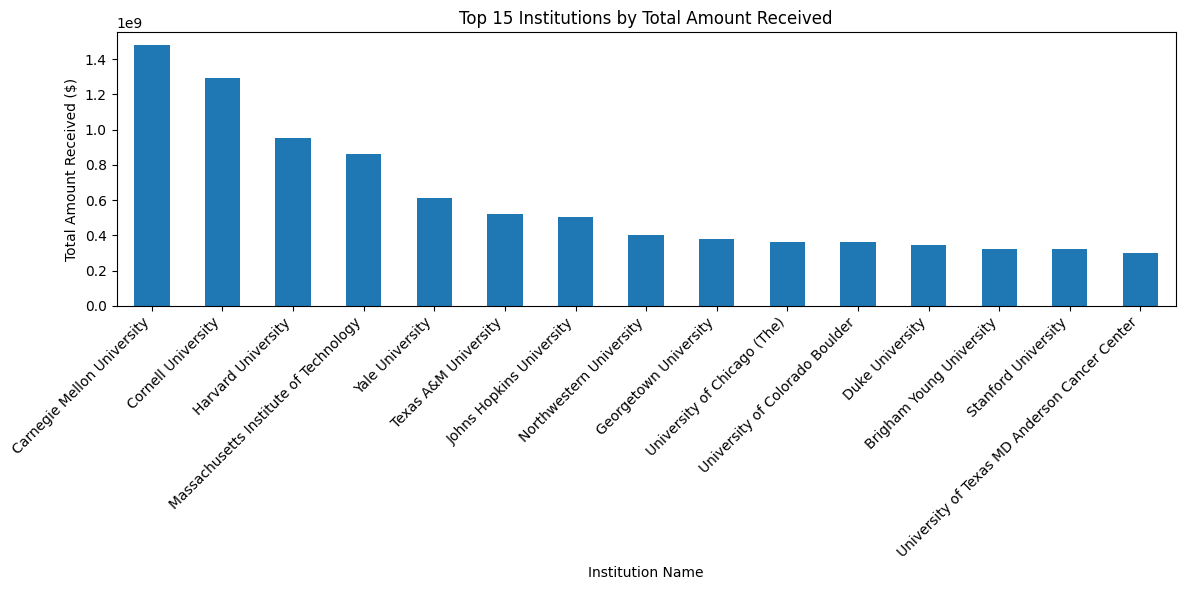

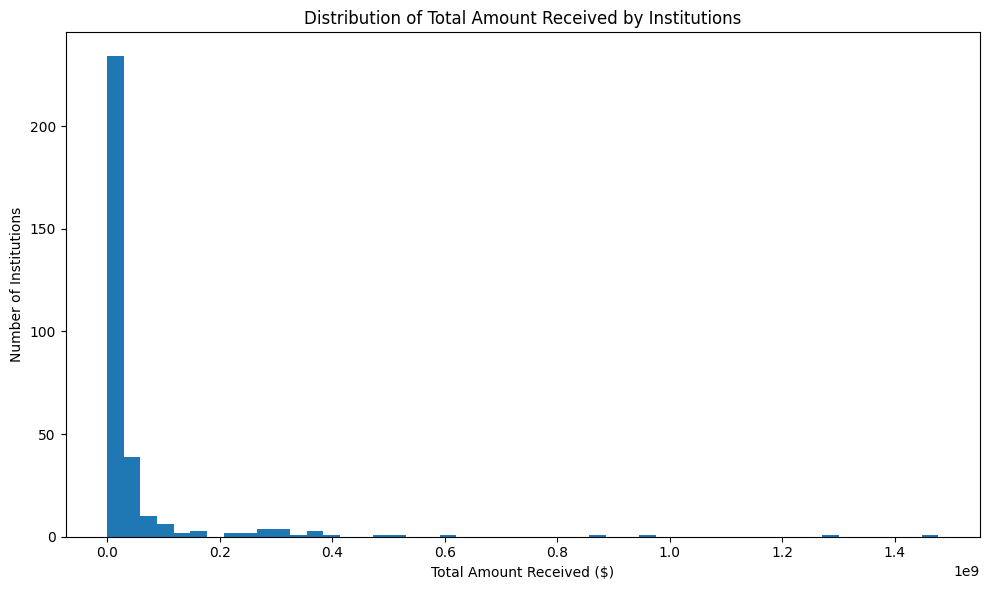

In [12]:
# Top 15 institutions by total amount received
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Institutions by Total Amount Received:")
print(top_institutions, '\n')

# visualizing top 15 institutions
plt.figure(figsize=(12, 6))
top_institutions.plot(kind='bar', grid=False)
plt.xlabel('Institution Name')
plt.ylabel('Total Amount Received ($)')
plt.title('Top 15 Institutions by Total Amount Received')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# histogram of total amount received by all institutions
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
institution_totals.hist(bins=50, grid=False)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amount Received by Institutions')
plt.tight_layout()
plt.show()

7. Which giftors provide the most money, in total?

Top 15 Giftors by Total Amount Given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64 



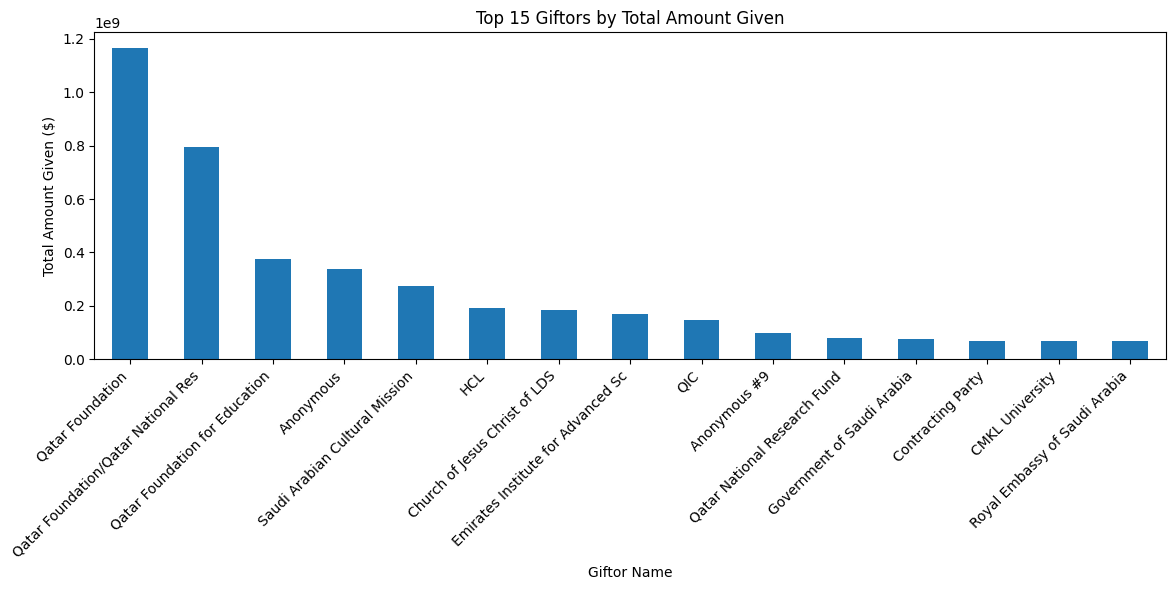

In [13]:
# Top giftors by total amount given
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Giftors by Total Amount Given:")
print(top_giftors, '\n')

# visualizing top 15 giftors
plt.figure(figsize=(12, 6))
top_giftors.plot(kind='bar', grid=False)
plt.xlabel('Giftor Name')
plt.ylabel('Total Amount Given ($)')
plt.title('Top 15 Giftors by Total Amount Given')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [14]:
df = pd.read_csv('./data/airbnb_hw.csv')

# describing the variable
print(df.shape)
print(df.columns.tolist(), '\n')
print(df.head(),'\n')
print(df.describe(),'\n')

(30478, 13)
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating'] 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3

Shape: 30,478 rows × 13 columns

Number of observations: 30,478 

Number of variables: 13 ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [15]:
# cross tabulate room & property type
crosstab = pd.crosstab(df['Room Type'], df['Property Type'], margins=True)
print("Cross-tabulation of Room Type and Property Type:")
print(crosstab, '\n')

# calculate proportions to see patterns more clearly
crosstab_pct = pd.crosstab(df['Room Type'], df['Property Type'], normalize='columns') * 100
print("Percentage breakdown by Property Type:")
print(crosstab_pct.round(2))

Cross-tabulation of Room Type and Property Type:
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   
All                  27102              180     8         4      2          7   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   
All                   1       1           94    31   2090    2           1

Patterns in rental availability: 
- Apartments seem to dominate the market, with entire home/apartment rentals being slightly more common than private rooms. 
- Bboats, condos, and RVs are predominantly rented entirely, while hospitality-style properties tend to offer room-by-room rentals.

Property types where private rooms are more common than entire rentals: 
- Bed & Breakfasts (86% private rooms vs. 7% entire property) and Houses (60% vs. 36%) are the main property types where private rooms dominate. This makes sense because these are properties where hosts typically live on-site and rent out individual rooms rather than the entire space.

4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

Statistical description of Price:
count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



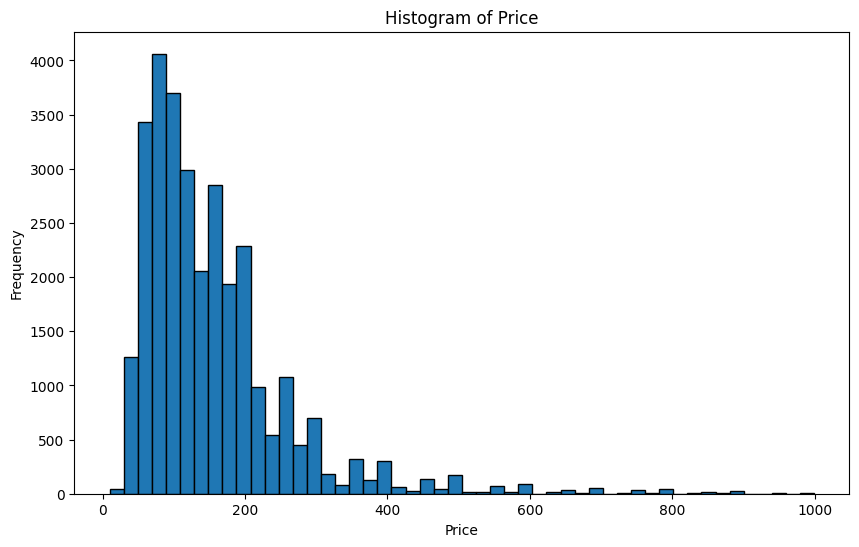

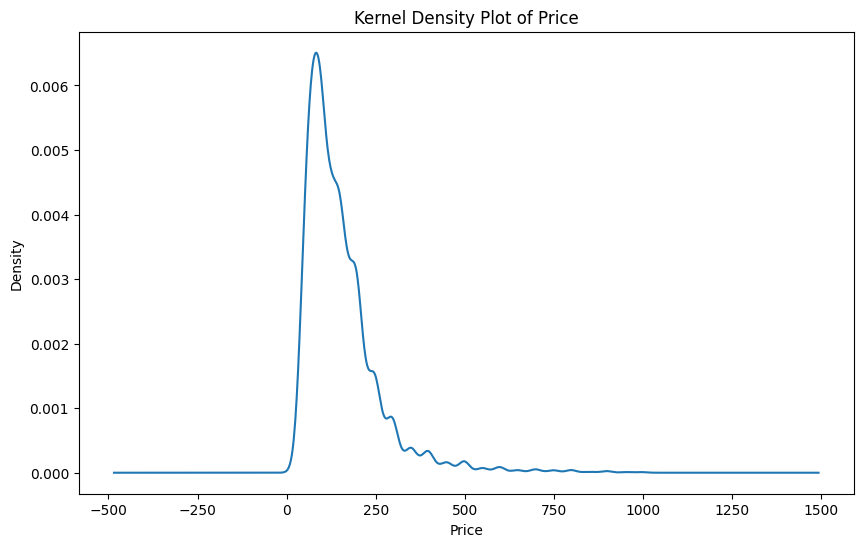

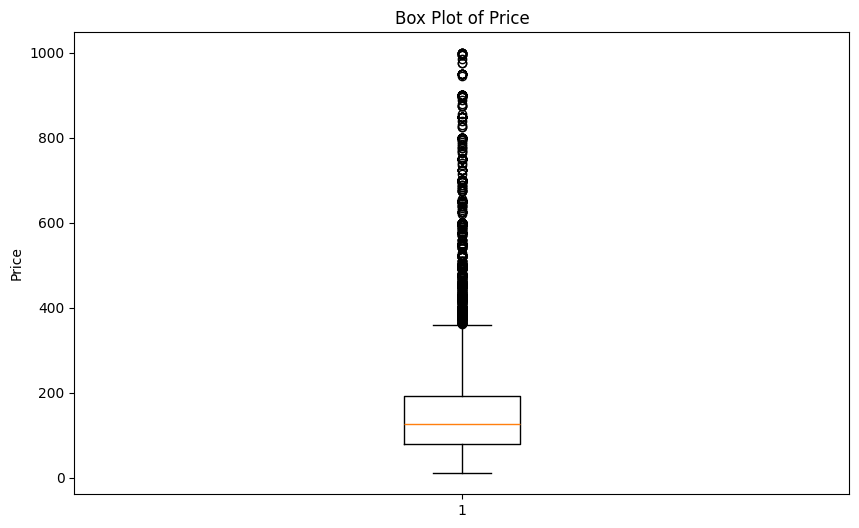

In [16]:
# statistical description
print("Statistical description of Price:")
print(df['Price'].describe(), '\n')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# kernel density plot
plt.figure(figsize=(10, 6))
df['Price'].dropna().plot(kind='kde')
plt.xlabel('Price')
plt.title('Kernel Density Plot of Price')
plt.show()

# box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'].dropna())
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

The graphs seem to be badly scaled, with several outliers. This is especially evident when looking at the data through the box plot, where it clearly shows the outliers up to $1000.

Statistical description of price_log:
count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64 



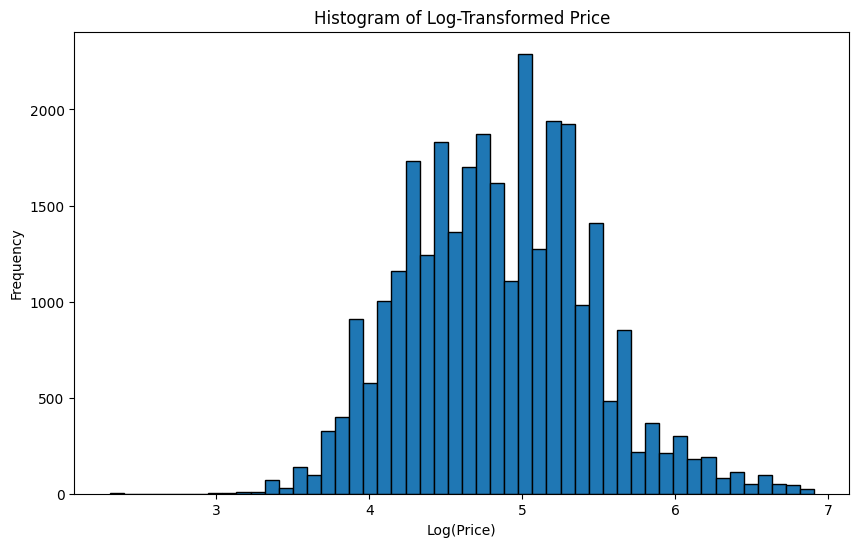

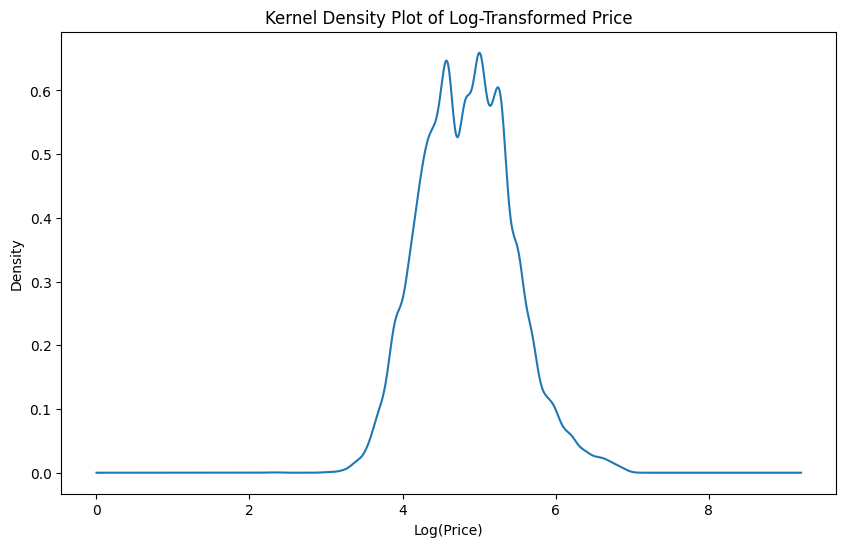

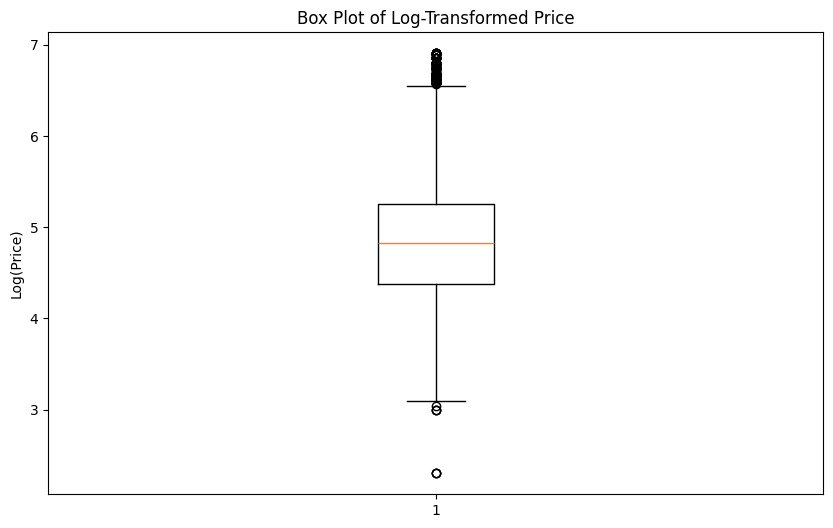

In [17]:
# log-transformed price variable
df['price_log'] = np.log(df['Price'])

# Statistical description of log-transformed price
print("Statistical description of price_log:")
print(df['price_log'].describe(), '\n')

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price_log'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Price')
plt.show()

# kernel density plot
plt.figure(figsize=(10, 6))
df['price_log'].dropna().plot(kind='kde')
plt.xlabel('Log(Price)')
plt.title('Kernel Density Plot of Log-Transformed Price')
plt.show()

# box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price_log'].dropna())
plt.ylabel('Log(Price)')
plt.title('Box Plot of Log-Transformed Price')
plt.show()

After transforming the price variable, the graphs seem to fall under a more normal distribution.

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

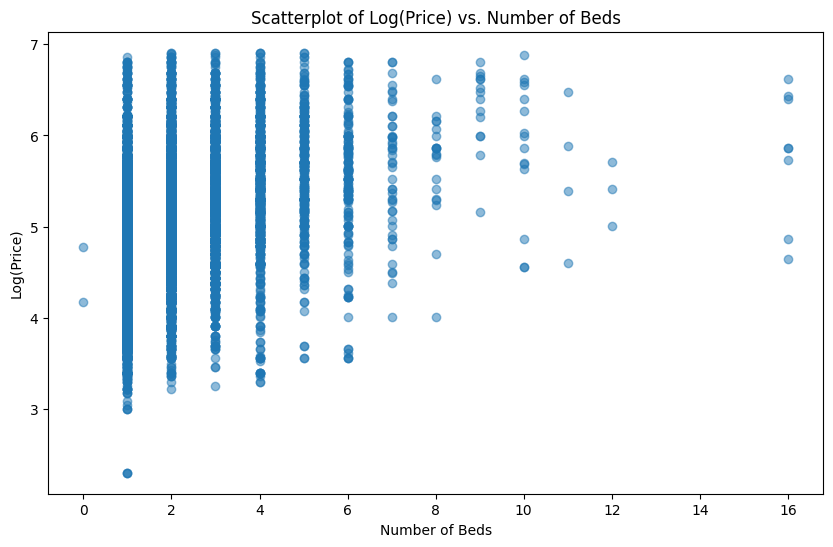

In [18]:
# scatterplot:

plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['price_log'], alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot of Log(Price) vs. Number of Beds')
plt.show()

The scatterplot shows a positive relationship between the number of beds and log(price). There's a lot of variation at each bed count though, meaning other factors beyond just beds are affecting the price. The pattern is pretty clear for 1-6 beds, but there's less data for the larger properties so those bands are thinner.

In [19]:
# grouped description of Price by number of Beds
print("Price statistics grouped by number of Beds:")
price_by_beds = df.groupby('Beds')['Price'].describe()
print(price_by_beds)

Price statistics grouped by number of Beds:
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  40

The mean price increases pretty consistently as the number of beds goes up: studios/1-beds average around $93-125, while larger places with 5-7 beds average over $300. The standard deviation also gets bigger as bed count increases, jumping from around $38 for 0 beds to $175-220 for 4-7 bed properties, which means there's way more price variation in larger units. Basically, more beds eequals a higher price but also more unpredictable pricing, probably because bigger places can vary a lot more in quality and location.

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

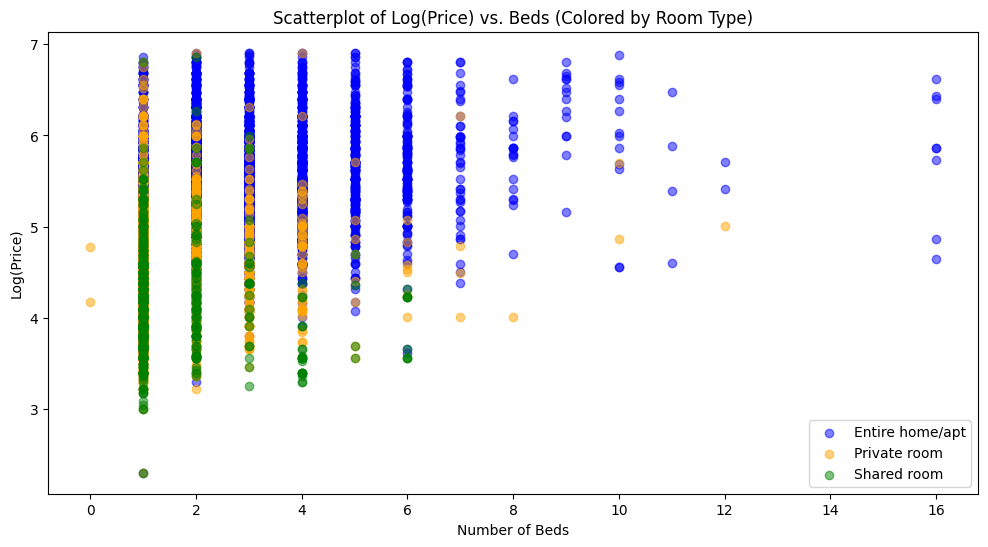

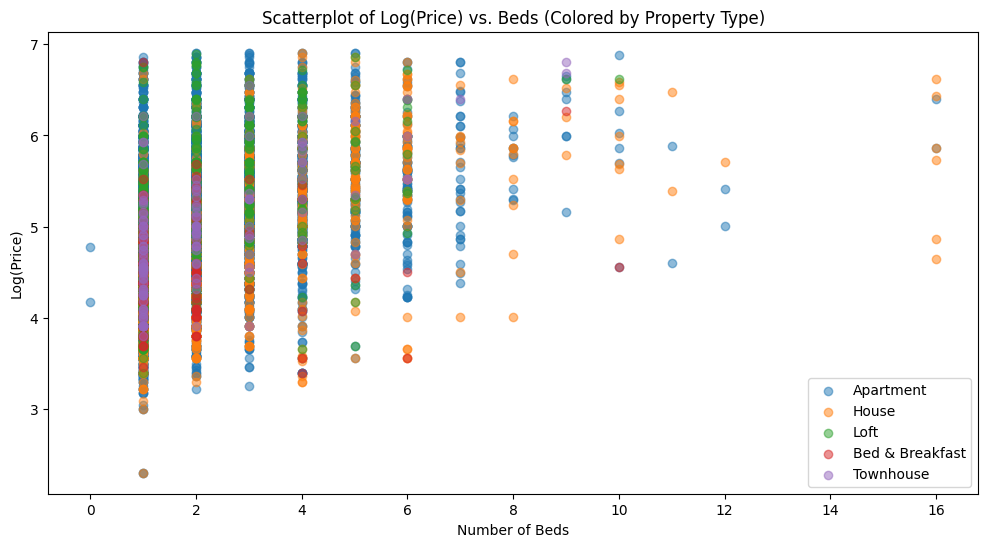

In [20]:
# scatterplot colored by room type
plt.figure(figsize=(12, 6))
room_types = df['Room Type'].unique()
colors = ['blue', 'orange', 'green']
for i, room_type in enumerate(room_types):
    subset = df[df['Room Type'] == room_type]
    plt.scatter(subset['Beds'], subset['price_log'], 
                alpha=0.5, label=room_type, color=colors[i])
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot of Log(Price) vs. Beds (Colored by Room Type)')
plt.legend()
plt.show()

# scatterplot colored by property type
plt.figure(figsize=(12, 6))

main_property_types = df['Property Type'].value_counts().head(5).index
df_main = df[df['Property Type'].isin(main_property_types)]

for prop_type in main_property_types:
    subset = df_main[df_main['Property Type'] == prop_type]
    plt.scatter(subset['Beds'], subset['price_log'], 
                alpha=0.5, label=prop_type)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot of Log(Price) vs. Beds (Colored by Property Type)')
plt.legend()
plt.show()

For Room Type:

There's a clear vertical separation by room type within each bed count: entire home/apt listings (blue) are clustered at the top with the highest prices, private rooms (orange) sit in the middle range, and shared rooms (green) are concentrated at the bottom with the lowest prices. This makes sense since renting an entire place costs way more than just getting a room. You can also see that entire homes dominate the higher bed counts (5+ beds), while private and shared rooms mostly appear in properties with 1-6 beds, probably because people don't usually rent out individual rooms in really large properties.

For Property Type:

Apartments (blue) dominate across all bed counts from 0-10+ beds and are pretty evenly distributed throughout the price range, which makes sense since they're the most common property type. Houses (orange) and townhouses (purple) show up more at higher bed counts (3+ beds) and tend to cluster at mid-to-high prices, while lofts (green) appear mostly in the 1-5 bed range. Bed & Breakfasts (red) are scattered but seem to have more consistent pricing within each bed category, probably because they're more standardized as a business model.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

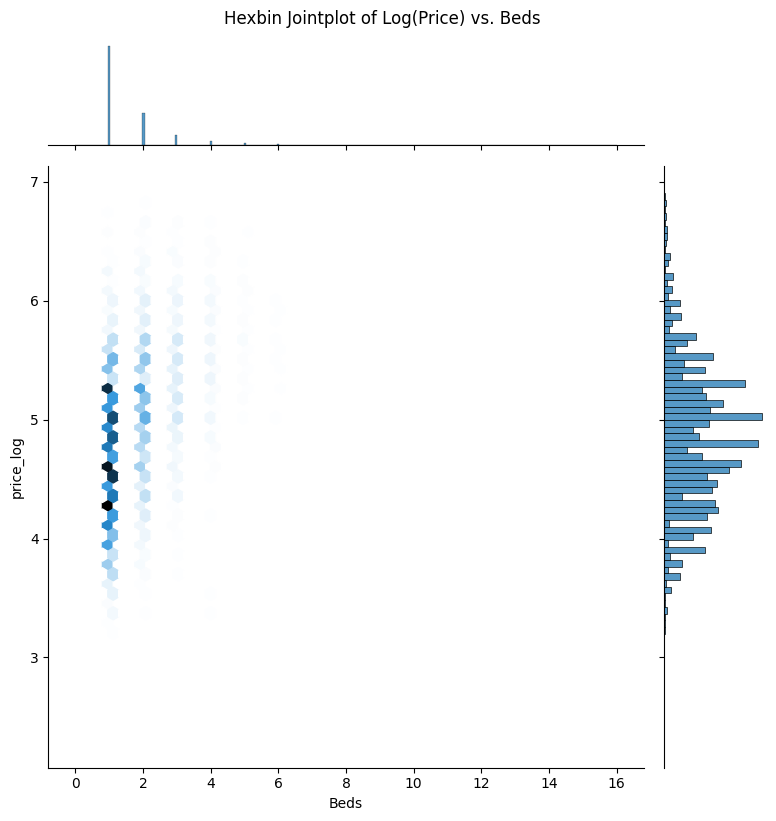

In [21]:
import seaborn as sns

sns.jointplot(x='Beds', y='price_log', data=df, kind='hex', height=8)
plt.suptitle('Hexbin Jointplot of Log(Price) vs. Beds', y=1.02)
plt.show()

The hexbin plot shows that the data is heavily concentrated in just a few areas: the darkest hexagons are at 1-2 beds with log(price) around 4.5-5.5 (which translates to roughly $90-250). The marginal histograms on the top and right confirm this, with the vast majority of listings have 1-2 beds, and prices cluster around log(price) = 4.5-5. Everything beyond 3-4 beds or outside the typical price range represents only a tiny fraction of the dataset.

For plots 5 and 6, it made the earlier scatterplots look more misleading, because they made every listing look equally important (the high-end properties and large homes got the same visual weight as the typical listings). In reality, like 80% of the market is just 1-2 bedroom places in the $75-200 range, and all those interesting patterns we saw with different room types and property types at higher bed counts are actually based on very few observations. The hexbin makes it clear that most of what we were analyzing before was actually just noise from outliers rather than the real Airbnb market.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [22]:
rigs = pd.read_csv('./data/drilling_rigs.csv')

# Examine the data
print("First few rows:")
print(rigs.head(), '\n')

print("Data info:")
print(rigs.info(), '\n')

print("Shape of data:")
print(f"Number of observations: {rigs.shape[0]}")
print(f"Number of variables: {rigs.shape[1]}\n")

print("Data types:")
print(rigs.dtypes, '\n')

print("Check for non-numeric values in numeric columns:")
for col in rigs.columns:
    print(f"{col}: {rigs[col].dtype}")

First few rows:
           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                           

Number of observations: 623

Number of variables: 10

Most of the numeric columns were not correctly read in, only 3 out of 9 numeric columns showed as ints. The other 6 columns that should be numeric are currently stored as strings.

How these data need to be cleaned:
1) Convert the month column to datetime format so we can actually work with it as a time series. 
2) Turn all the values into NaN values by coercing them into numeric.
3) Handle all the NaN values (drop them, fill them with 0, or just leave them as missing) 


___________________________________________________________

2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [23]:
rigs['time'] = pd.to_datetime(rigs['Month'], format='mixed')

# Check the result
print("First few rows of time column:")
print(rigs['time'].head(), '\n')

print("Data type of time column:")
print(rigs['time'].dtype, '\n')

print("Updated data info:")
print(rigs.info())

First few rows of time column:
0   1973-01-01
1   1973-02-01
2   1973-03-01
3   1973-04-01
4   1973-05-01
Name: time, dtype: datetime64[us] 

Data type of time column:
datetime64[us] 

Updated data info:
<class 'pandas.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    str           
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of

3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

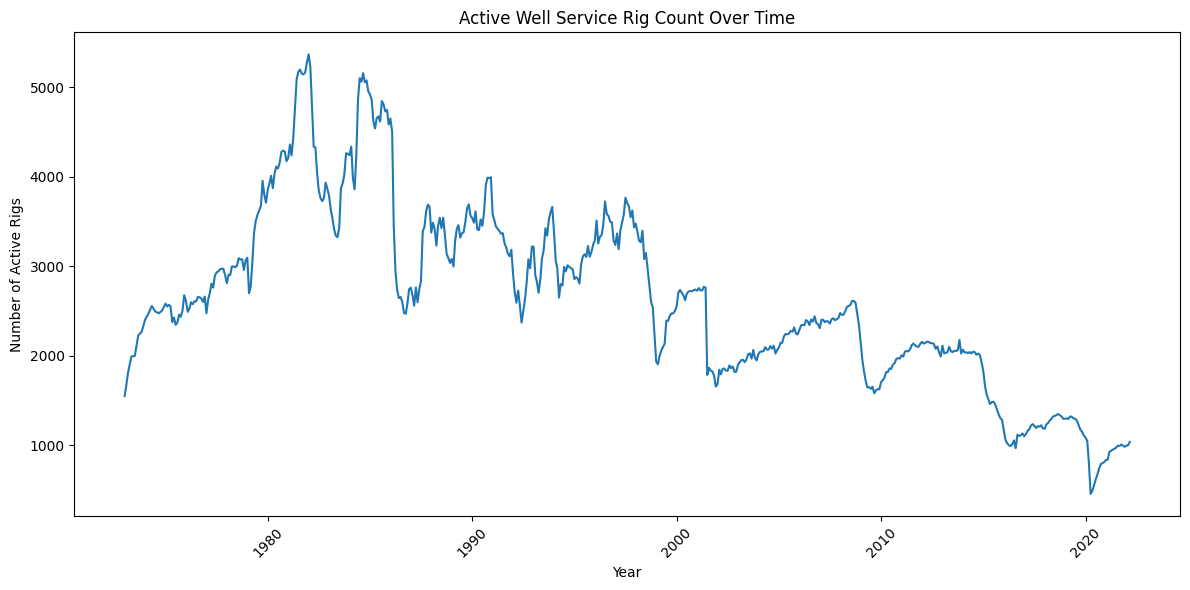

In [24]:
rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    rigs['Active Well Service Rig Count (Number of Rigs)'], 
    errors='coerce'
)

# line plot
plt.figure(figsize=(12, 6))
plt.plot(rigs['time'], rigs['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Year')
plt.ylabel('Number of Active Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The time series shows lots of upwards and downwards trends in drilling rig activity over the past 50 years. The overall pattern shows the oil industry going through massive boom-bust cycles, with recent years showing way fewer active rigs than historical peaks.

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

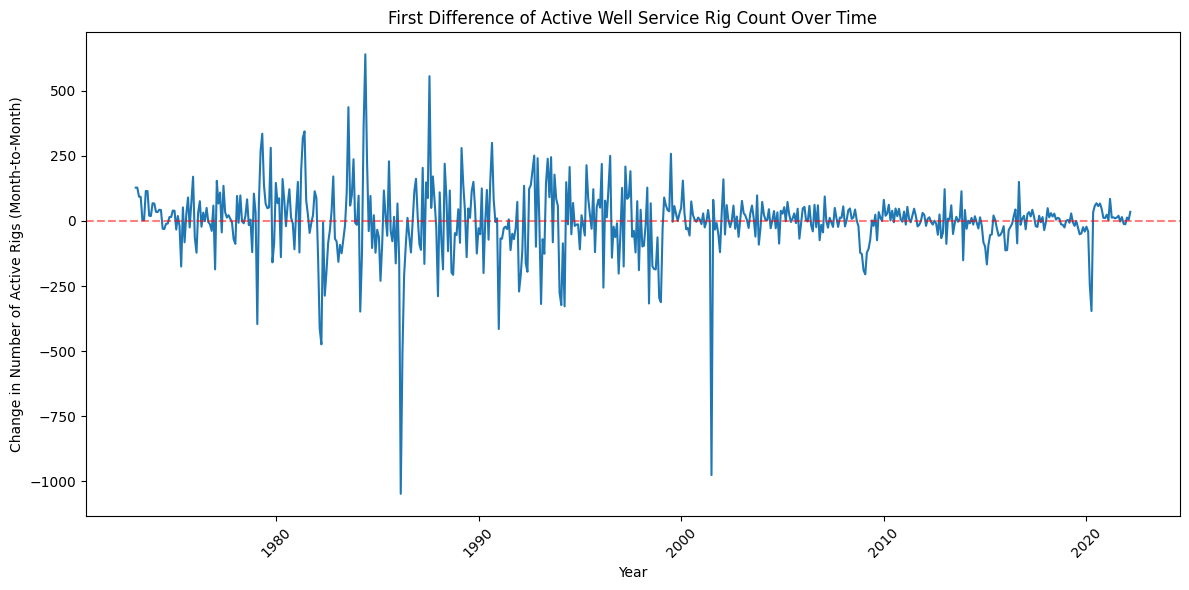

In [26]:
rigs['rig_count_diff'] = rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 6))
plt.plot(rigs['time'], rigs['rig_count_diff'])
plt.xlabel('Year')
plt.ylabel('Change in Number of Active Rigs (Month-to-Month)')
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows month-to-month changes in rig count, and there's a lot of changes throughout the time series. There are some extreme spikes, especially in the 1980s and early 2000s, where rig counts changed by several hundred in a single month. Overall, the changes fluctuate around zero with no clear trend, suggesting the rig count responds to short-term market conditions rather than following a consistent direction.

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

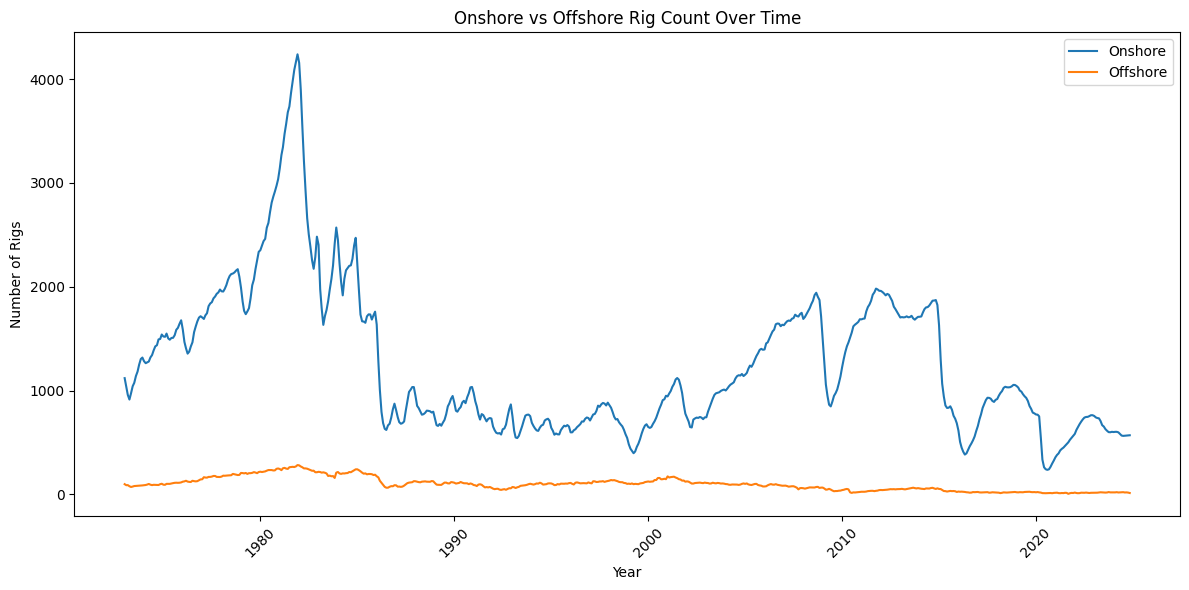

In [27]:
# melt columns
rigs_melted = rigs.melt(
    id_vars=['time'], 
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Location',
    value_name='Rig Count'
)

rigs_melted['Location'] = rigs_melted['Location'].str.replace(
    'Crude Oil and Natural Gas Rotary Rigs in Operation, ', ''
).str.replace(' (Number of Rigs)', '')

# plot
plt.figure(figsize=(12, 6))
for location in rigs_melted['Location'].unique():
    data = rigs_melted[rigs_melted['Location'] == location]
    plt.plot(data['time'], data['Rig Count'], label=location)

plt.xlabel('Year')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Count Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()